# Hadamard Gate

This program simulates a Hadamard gate.  
Author: Michal Forgó  
Time: 12.8.2025  
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

The Hadamard Gate is a fundamental quantum gate that creates an equal superposition of the basis states $$|0\rangle$$ and $$|1\rangle$$. It maps the state

$$
|0\rangle \to \frac{|0\rangle + |1\rangle}{\sqrt{2}} \quad \text{and} \quad |1\rangle \to \frac{|0\rangle - |1\rangle}{\sqrt{2}}.
$$

This makes it essential in quantum algorithms that rely on superposition.

The matrix for the Hadamard gate is:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$

Applying the Hadamard matrix $$H$$ to a general qubit state $$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$$ is done by matrix multiplication:

$$
H |\psi\rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta \\
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
\alpha + \beta \\
\alpha - \beta \\
\end{bmatrix}
$$

For example, if $$\alpha = 1$$ and $$\beta = 0$$ (i.e., $$|\psi\rangle = |0\rangle$$), then

$$
H|0\rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
= \frac{|0\rangle + |1\rangle}{\sqrt{2}}.
$$

Below is an example implementation in Python using Qiskit, a popular quantum computing framework:



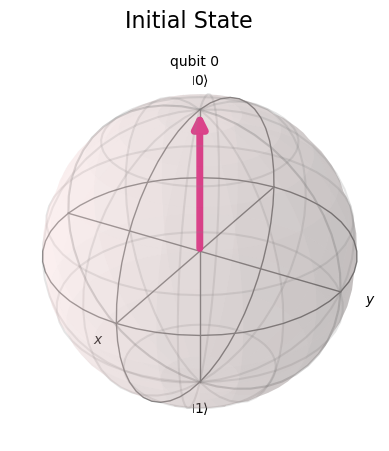

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

plot_bloch_multivector(Statevector(circuit), title="Initial State")

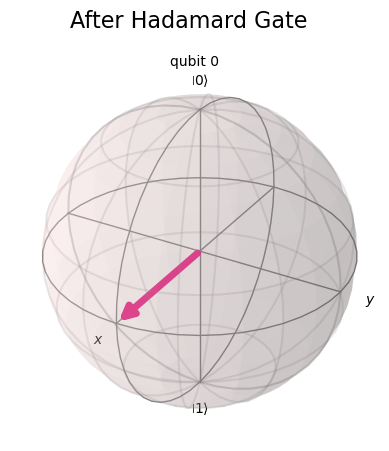

In [2]:
circuit.h(qreg_q[0])
plot_bloch_multivector(Statevector(circuit), title="After Hadamard Gate")   

In [3]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

In [4]:
circuit.measure(qreg_q[0], creg_c[0])

sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print(result.get_counts(circuit))

{'1': 2521, '0': 2479}
